# Quantum Computing In Qiskit With Examples

In [65]:
#Outcomment to install dependencies.
#import pip
#! pip3 install qiskit
#! pip3 install matplotlib
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from IPython.display import Math
from IPython.display import Image
from IPython.core.display import HTML 

# Introduction
This notebook is constructed as a part of the Bluesmartie Quantum Experience Hands-on session.
The purpose of this notebook is to give an introduction to all functions available in the Qiskit framework as well as give an introduction to how Quantum Computers work.

Before we start, it is important to have som basic knowledge about how quantum computers work, what we can expect from them and how they can be utilized.

# What is a Qubit?

Before we begin it is important to first talk a bit about Qubits. Quibits are like traditional bits in a computer in the way thtat they can either be 1 or 0 (|0>,|1>) the notation of the Qubits just tell us that we are talking about quantum objects.

But there are also ways in which it does not act like a typical computer. One of the main differences between Qubits and traditional bits is that Qubits are able to be in a superposition between 1 and 0 (α|0⟩+β|1⟩).

Where α and β are complex numbers which are related to the probability of obtaining a certain outcome. A Qubit state is simutainiouly 0 and 1, and only when mesured, can it take the form of one of two values

$$ r'|\alpha^2| or |\beta^2|' $$

## Entanglement

The ideá of intanglement is one which is unique to quantum computing. It is the idea that Qubits can have an effect on each others state. 
If two Qubits are entangled, their values are strictly related to each other. This means that one value taken from one Qubit will have some relation to the Qubit(s) in which it is entangled.

# Setting up your quantum circuit

Okay. So now that we have covered the basics, it is time to start making quantum algorithms. The first thing that we need to do to get started with qiskit is to create a quantum register as well as a circuit. For this case we will use a Quantum Register with 3 quibits named q1, and a Quantum Circuit which takes the register as a parameter

In [4]:
# Create a Quantum Register with 3 qubits.
qr = QuantumRegister(1,'q1')
# We also need to create a classical register to measure our values
cr = ClassicalRegister(1)
# Create a Quantum Circuit acting o<n the q register
circ = QuantumCircuit(qr,cr)

To view our circuit, we can call the circ.draw() function

In [5]:
circ.draw()

If you have used the IBMQ composer you should be familiar with this drawing, as it's layout mimics this structure. 

In [6]:
Image(url="https://cdn-images-1.medium.com/max/2000/1*c5NCMQAmGOQqIvRK9aiaCg.png")

# Looking at gates

## X Gates
The X gates flips the state of the bit. In traditional computing this can be directly related to that of a NOT gate. We can add an X gate to our circuit like so:

In [7]:
measure_x = QuantumCircuit(qr,cr)

measure_x.x(qr[0])
measure_x.draw()

Now if we try to measure the Qubit in position 0, we should recive a |1>

To measure the Qubits, we need to use the BasicAer module

In [8]:
# Import Aer framework
from qiskit import BasicAer
from qiskit.quantum_info import state_fidelity, basis_state

In [9]:
# Run the quantum circuit on a statevector simulator backend
backend = BasicAer.get_backend('qasm_simulator')

Now we need to add a measure from our quantum register qr[0] to our register cr[0]

In [10]:
measure_x.measure(qr[0], cr[0])

In [11]:
measure_x.draw()

Now, when we excecute a job, we can measure the result on our register. 

In [12]:
result = execute(measure_x, backend).result()

In [13]:
result.get_counts(measure_x)

{'1': 1024}

As predicted, our quantum circuit now shows 1 as the result. The other number that we see is the certainty of the outcome.

### Visualizing the output

Now, lets try drawing the output as a histogram.

In [14]:
from qiskit.tools.visualization import plot_histogram

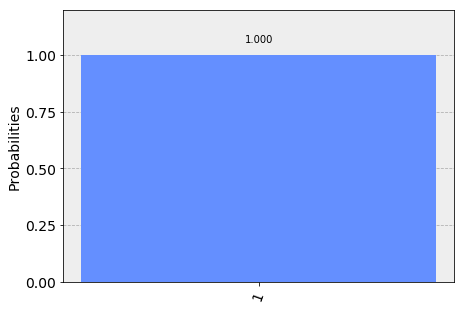

In [15]:
plot_histogram(result.get_counts(measure_x))

## The Hadamard gate
The hadamard gate is one of the most common gates used in quantum computing, and one that you surely will get more aquainted with as you explore quantum computing. The hadamar gate transform the quantum state to superpositions, from 0 to |+> and 1 to |->. This is often used at the start of 

In [16]:
measure_h = QuantumCircuit(qr,cr)

measure_h.h(qr[0])
measure_h.draw()

In [17]:
measure_h.measure(qr[0], cr[0])
result = execute(measure_h, backend).result()

In [18]:
counts = result.get_counts(measure_h)

In [19]:
counts

{'0': 518, '1': 506}

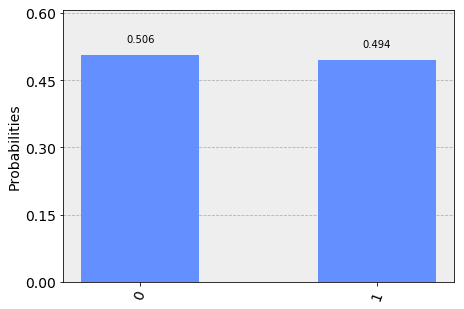

In [20]:
plot_histogram(counts)

Since we measured the states in a superposition, we receive a complex number.

## The Z gate
The purpose of the Z gate is to flip the phase of the Qubit thereby shifting the relative signs from α to β and vice versa. 

Let's try and add a Z gate to our second register

In [21]:
measure_z = QuantumCircuit(qr,cr)

measure_z.z(qr[0])
measure_z.draw()

Now let's try to measure it.

In [22]:
measure_z.measure(qr[0], cr[0])

In [23]:
result = execute(measure_z, backend).result()

In [24]:
result.get_counts(measure_z)

{'0': 1024}

This does not say much, but if we combine the result with a hadamard gate to put the Qubit into a superposition, we get can observe the shift in action

In [25]:
measure_zh = QuantumCircuit(qr,cr)

measure_zh.h(qr[0])

In [26]:
measure_zh.z(qr[0])
measure_zh.h(qr[0])
measure_zh.measure(qr[0], cr[0])
result = execute(measure_zh, backend).result()
measure_zh.draw()

In [27]:
result.get_counts(measure_zh)

{'1': 1024}

As we can see, the phase shift of the Qubit while in superposition has shifted the result of the measure from 0 to 1

## The Y gate.
The Y gate shifts both the phase and state of the Qubit. 

## The CX (Controlled-NOT) gate
This gate is known as a two-Qubit gate, which means that it needs two Qubits to function.

One Qubit is taken as a control Qubit (and is not affected by the gate) while the other is used as a "target" Qubit. If the control Qubit is in the state |0> then nothing is done to the target, but if the control Qubit is in state |1> a X gate operation is applied to the target Qubit.

In [28]:
# Create a Quantum Register with 2 qubits.
qr2 = QuantumRegister(2,'q1')
# We also need to create a classical register to measure our values
cr2 = ClassicalRegister(2)
measure_CX = QuantumCircuit(qr2,cr2)

measure_CX.cx(qr2[0],qr2[1])
measure_CX.draw()

In [29]:
measure_CX.measure(qr2, cr2)

In [30]:
result = execute(measure_CX, backend).result()

In [31]:
result.get_counts(measure_CX)

{'00': 1024}

### What happened?

Well. not much. As we can see, since our control Qubit has not been flipped, there is not a noticable difference in the output. Let's try again, but this time adding a x gate to our control Qubit.

In [32]:
measure_CX = QuantumCircuit(qr2,cr2)
measure_CX.x(qr2[0])
# A Controlled-NOT gate with Qubit 0 as the control, and Qubit 1 as the target.
measure_CX.cx(qr2[0],qr2[1])
# We draw the circuit
measure_CX.draw()

In [33]:
measure_CX.measure(qr2, cr2)
result = execute(measure_CX, backend).result()
result.get_counts(measure_CX)

{'11': 1024}

As we can see since the control Qubit (q[0]) is 1, the target Qubit becomes 1 as well. 
Now lets talk about entanglement.

### Using C-NOT gates while in superposition.

If we try to apply the C-NOT gate to our Qubits while the control Qubit is in a superposition, the two Qubits becomes entangled. This means that the stocastic outcomes between the two Qubits become correlated in all future operations.

In [39]:
measure_CX_SP = QuantumCircuit(qr2,cr2)
# We add a hadamard gate to place our control Qubit in a superposition
measure_CX_SP.h(qr2[0])
# We add a X gate to flip the control bit
measure_CX_SP.x(qr2[0])
# A Controlled-NOT gate with Qubit 0 as the control, and Qubit 1 as the target.
measure_CX_SP.cx(qr2[0],qr2[1])
# We draw the circuit
measure_CX_SP.draw()

In [40]:
measure_CX_SP.h(qr2[0])
measure_CX_SP.draw()

In [41]:
measure_CX_SP.measure(qr2, cr2)
result = execute(measure_CX_SP, backend).result()
result.get_counts(measure_CX_SP)

{'10': 238, '00': 264, '11': 273, '01': 249}

### What happened? 

The entaglement of the bits are closely related, and therefore the measurement of one bit will give the result of the other. Therefor the properbility of one outcome is defined as 1/n where n = entagled Qubits.

# Running your code on a real Quantum Computer

As you may have noticed, all our tests up until now have only been running on a simulation. This is known as the 'qasm_simulator', which is defined in our backend.

In [42]:
BasicAer.get_backend('qasm_simulator')

<QasmSimulatorPy('qasm_simulator') from BasicAer()>

The simulator is fine for running most basic quantum circuits, since the outcomes of these calculations are already known. But if you want to develop new algorithms or try out the later example we will need to run them on a real machine. 

To run our calculations on a existing quantum computer, we must first import IBMQ 

In [43]:
from qiskit import IBMQ

In the root of your directory, a file can be found named "credentials.py", this is where you write the your API key credentials which can be found at https://quantumexperience.ng.bluemix.net/qx/account/advanced.

In [52]:
%run credentials.py
API_Token

'30a72676694a5a841734c158109bd5e8cc9d5c4a09af52d041ba14a1bd9ae1054adcb2b88ed854ef6e02c5d9cf98a53b96ffcd92b8defa297be6194cd5c5bd89'

If you are running this in a container, or it for some reason does not work, please remove the comments from the following and paste in your api key.

In [53]:
# API_Token = "<Your_Key_Here>"

In [57]:
# We now save the account so we can use it with IBMQ
IBMQ.save_account(API_Token)
# And now we register which account we are using.
IBMQ.load_accounts()

### Choosing a backend
As mentioned before, the qasm simulator is only one of a handfull of available backends to use for running our quantum programs. Too see all available backends, we can run the following code.

In [63]:
# Get list of available backends
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [88]:
# We choose the backend that we want to use.
#device = IBMQ.get_backend('ibmqx4')
# But for the sake of speed we will use the least busy one
from qiskit.providers.ibmq import least_busy
device = least_busy(IBMQ.backends(simulator=False))
device

<IBMQBackend('ibmqx4') from IBMQ()>

In [89]:
# We can now Generate a quantum circuit like before.
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

In [90]:
# We add an x gate at q0
qc.x(q[0])

In [91]:
# And add a measure to our Qubit.
measure = qc.measure(q, c)

In [92]:
qc.draw()

In [93]:
from qiskit.tools.monitor import job_monitor

# We excecute the job on the choosen device
job_sim = execute(qc, device)
# The job monitor makes it possible for us to monitor our job in real time
job_monitor(job_sim, monitor_async=True)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

After a couple of seconds you should see an output with the status of your job in the cell above. this can take some time depending on how busy the machines are. So grab a cup of coffee, or continue on while we wait.

In [94]:
# When the job is done, the results can be showed below.
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

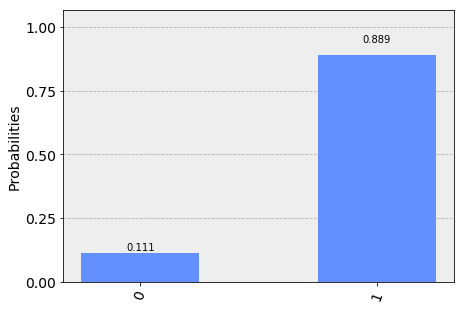

In [95]:
plot_histogram(counts)

# Quantum algorithms

## Random number generation